# ⚡Difinition of The Data

- `hotel` - Hotel (H1 = Resort Hotel or H2 = City Hotel)
    
    - `City Hotel` is a type of hotel located in urban centers and is typically found in large cities.

    - `Resort Hotel` is an accommodation type usually built on the coastline or at the foot of mountain hills, offering scenic natural views.

- `is_canceled` - Value indicating if the booking was canceled (1) or not (0)

- `lead_time` - Number of days that elapsed between the entering date of the booking into the PMS (Property Management System) and the arrival date

- `arrival_date_year` - Year of arrival date

- `arrival_date_month`- Month of arrival date

- `arrival_date_week_number` - Week number of year for arrival date

- `arrival_date_day_of_month` - Day of arrival date

- `stays_in_weekend_nights` - Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel

- `stays_in_weekdays_nights` - Number of weekdays nights (Monday to Friday) the guest stayed or booked to stay at the hotel

- `adults` - Number of adults

- `children` - Number of children

- `babies` - Number of babies

- `meal` - Type of meal booked. Categories are presented in standard hospitality meal packages: 
    - Undefined/SC – no meal package
    - BB – Bed & Breakfast
    - HB – Half board (breakfast and one other meal – usually dinner) 
    - FB – Full board (breakfast, lunch and dinner)

- `city` - City name

- `market_segment` - Market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators”

- `distribution_channel` - Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators”

- `is_repeated_guest` - Value indicating if the booking name was from a repeated guest (1) or not (0)

- `previous_cancellations` - Number of previous bookings that were cancelled by the customer prior to the current booking

- `previous_bookings_not_canceled` - Number of previous bookings not cancelled by the customer prior to the current booking

- `booking_changes` - Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation

- `deposit_type` - Indication on if the customer made a deposit to guarantee the booking. This variable can assume three categories: 
    - No Deposit – no deposit was made
    - Non Refund – a deposit was made in the value of the total stay cost
    - Refundable – a deposit was made with a value under the total cost of stay

    Note : The deposit is a security deposit that will be paid back to you as a customer. However, on condition that none of the facilities you enjoy are damaged and do not use other paid hotel facilities, then the deposit money will be returned 100% to you after no damage to this hotel's facilities.

- `agent` - ID of the travel agency that made the booking

- `company` - ID of the company/entity that made the booking or responsible for paying the booking. ID is presented instead of designation for anonymity reasons

- `days_in_waiting_list` - Number of days the booking was in the waiting list before it was confirmed to the customer

- `customer_type` - Type of booking, assuming one of four categories: 
    - Contract - when the booking has an allotment or other type of contract associated to it; 
    - Group – when the booking is associated to a group; 
    - Transient – when the booking is not part of a group or contract, and is not associated to other transient booking; 
    - Transient-party – when the booking is transient, but is associated to at least other transient booking

- `adr`- Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying nights

- `required_car_parking_spaces` - Number of car parking spaces required by the customer

- `total_of_special_requests` - Number of special requests made by the customer (e.g. twin bed or high floor)

- `reservation_status` - Reservation last status, assuming one of three categories: 
    - Canceled – booking was canceled by the customer; 
    - Check-Out – customer has checked in but already departed; 
    - No-Show – customer did not check-in and did inform the hotel of the reason why


# Task 1

# ⚡Data Preparation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Ignores any warning
import warnings 
warnings.filterwarnings("ignore")

In [2]:
 df = pd.read_csv('hotel_bookings_data')
    
 pd.set_option('display.max_columns', None)
 df.sample(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,meal,city,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
73931,City Hotel,1,265,2017,September,28,9,0,2,2,0.0,0,Breakfast,Kota Denpasar,Groups,TA/TO,0,1,0,0,No Deposit,1.0,NaN,0,Contract,62.0,0,0,Canceled
67929,City Hotel,1,173,2019,July,19,9,0,4,2,0.0,0,No Meal,Kota Jakarta Barat,Online TA,TA/TO,0,0,0,0,No Deposit,9.0,NaN,0,Personal,112.5,0,2,Canceled
26067,Resort Hotel,0,55,2018,September,30,21,0,3,2,0.0,0,Breakfast,Kabupaten Bangka,Online TA,TA/TO,0,0,0,0,No Deposit,240.0,NaN,0,Personal,172.0,0,1,Check-Out
5354,Resort Hotel,1,189,2018,June,18,26,0,2,2,0.0,0,Breakfast,Kota Denpasar,Groups,TA/TO,0,0,0,0,No Deposit,248.0,NaN,0,Family,46.0,0,0,Canceled
1533,Resort Hotel,0,154,2017,November,36,3,0,3,2,0.0,0,Breakfast,Kabupaten Kepulauan Seribu,Corporate,Direct,0,0,0,0,No Deposit,NaN,268.0,0,Family,88.2,0,0,Check-Out
105604,City Hotel,0,14,2019,April,6,8,0,4,2,0.0,0,Breakfast,Kabupaten Cianjur,Online TA,TA/TO,0,0,0,0,No Deposit,9.0,NaN,0,Personal,91.8,0,1,Check-Out
97306,City Hotel,0,346,2018,November,38,13,0,2,2,0.0,0,Dinner,Kabupaten Bandung,Offline TA/TO,TA/TO,0,0,0,0,No Deposit,6.0,NaN,0,Family,115.0,0,1,Check-Out
89871,City Hotel,0,14,2018,July,22,27,0,1,1,0.0,0,Breakfast,Kota Denpasar,Offline TA/TO,TA/TO,0,0,0,0,No Deposit,21.0,NaN,0,Family,62.5,0,0,Check-Out
45112,City Hotel,0,41,2017,December,42,16,1,2,1,0.0,0,Breakfast,Kota Denpasar,Online TA,TA/TO,0,0,0,0,No Deposit,9.0,NaN,0,Personal,96.9,0,2,Check-Out
23412,Resort Hotel,0,92,2018,June,17,21,1,3,2,0.0,0,Breakfast,Kabupaten Bangka,Direct,Direct,0,0,0,0,No Deposit,250.0,NaN,0,Personal,74.8,0,0,Check-Out


In [3]:
cat = df.select_dtypes(include='object').columns
num = df.select_dtypes(include=['int64', 'float64']).columns

In [4]:
print(cat)
print(num)

Index(['hotel', 'arrival_date_month', 'meal', 'city', 'market_segment',
       'distribution_channel', 'deposit_type', 'customer_type',
       'reservation_status'],
      dtype='object')
Index(['is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_weekdays_nights', 'adults',
       'children', 'babies', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes', 'agent', 'company',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests'],
      dtype='object')


# ⚡Pre-proccessing/Cleansing

### Info Data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_weekdays_nights        119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [6]:
print('Kolom :',df.shape[1])
print('Baris :',df.shape[0])

Kolom : 29
Baris : 119390


## 🎯Cek Null data

In [7]:
df.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_weekdays_nights               0
adults                                 0
children                               4
babies                                 0
meal                                   0
city                                 488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
booking_changes                        0
deposit_type                           0
agent                              16340
company                           112593
days_in_waiting_list                   0
customer_type   

In [8]:
#hanya melihat kolom yang null saja
df.columns[df.isna().any()].tolist()

['children', 'city', 'agent', 'company']

#### Observasi :
- Berdasarkan informasi di atas, bisa diketahui bahwa terdapat 29 features dengan baris sebanyak 119390
- Terdapat missing value pada features 'children', 'city', 'agent', 'company' 
- Tipe datanya adlaah : Float64 (4 features), int64 (16 features), object (9 features)

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,119390.0,0.370416,0.482918,0.00,0.00,0.000,1.0,1.0
lead_time,119390.0,104.011416,106.863097,0.00,18.00,69.000,160.0,737.0
arrival_date_year,119390.0,2018.156554,0.707476,2017.00,2018.00,2018.000,2019.0,2019.0
arrival_date_week_number,119390.0,27.165173,13.605138,1.00,16.00,28.000,38.0,53.0
arrival_date_day_of_month,119390.0,15.798241,8.780829,1.00,8.00,16.000,23.0,31.0
stays_in_weekend_nights,119390.0,0.927599,0.998613,0.00,0.00,1.000,2.0,19.0
stays_in_weekdays_nights,119390.0,2.500302,1.908286,0.00,1.00,2.000,3.0,50.0
adults,119390.0,1.856403,0.579261,0.00,2.00,2.000,2.0,55.0
children,119386.0,0.103890,0.398561,0.00,0.00,0.000,0.0,10.0
babies,119390.0,0.007949,0.097436,0.00,0.00,0.000,0.0,10.0


In [10]:
df.describe().T[['mean','25%','50%','75%','max']]

,mean,25%,50%,75%,max
is_canceled,0.370416,0.00,0.000,1.0,1.0
lead_time,104.011416,18.00,69.000,160.0,737.0
arrival_date_year,2018.156554,2018.00,2018.000,2019.0,2019.0
arrival_date_week_number,27.165173,16.00,28.000,38.0,53.0
arrival_date_day_of_month,15.798241,8.00,16.000,23.0,31.0
stays_in_weekend_nights,0.927599,0.00,1.000,2.0,19.0
stays_in_weekdays_nights,2.500302,1.00,2.000,3.0,50.0
adults,1.856403,2.00,2.000,2.0,55.0
children,0.103890,0.00,0.000,0.0,10.0
babies,0.007949,0.00,0.000,0.0,10.0


#### Observasi :

Setelah di perhatikan, didapatkan informasi bahwa banyak dari feature yang memiliki outliers. Hal ini bisa dilihat dari perbedaan mean dan median serta dilihat dari perbedaan maksimal dan Q3 yang jauh. Berikut beberapa features yang memiliki indikasi outliers :<br>
- lead_time, stays_in_weekend_nights, stays_in_weekdays_nights, adults, children, previous_cancellations, previous_bookings_not_canceled, booking_changes, agent, days_in_waiting_list, adr. <br>


## 🎯 Cek unik Value

In [11]:
#melihat unique value di setiap kolom bertipe object
for col in cat:
    unique_values = df[col].unique()
    print('Column:', col)
    print('Unique values:', list(unique_values[:15]))
    print()

Column: hotel
Unique values: ['Resort Hotel', 'City Hotel']

Column: arrival_date_month
Unique values: ['September', 'October', 'November', 'December', 'January', 'February', 'March', 'April', 'May', 'June', 'July', 'August']

Column: meal
Unique values: ['Breakfast', 'Full Board', 'Dinner', 'No Meal', 'Undefined']

Column: city
Unique values: ['Kota Denpasar', 'Kabupaten Bangka', 'Kabupaten Sleman', 'Kota Batu', 'Kota Malang', 'Kota Yogyakarta', nan, 'Kabupaten Tangerang', 'Kota Semarang', 'Kota Serang', 'Kota Tangerang', 'Kota Bogor', 'Kabupaten Bandung', 'Kabupaten Magelang', 'Kabupaten Sumedang']

Column: market_segment
Unique values: ['Direct', 'Corporate', 'Online TA', 'Offline TA/TO', 'Complementary', 'Groups', 'Undefined', 'Aviation']

Column: distribution_channel
Unique values: ['Direct', 'Corporate', 'TA/TO', 'Undefined', 'GDS']

Column: deposit_type
Unique values: ['No Deposit', 'Refundable', 'Non Refund']

Column: customer_type
Unique values: ['Personal', 'Contract', 'Famil

## 🎯Handling Duplicate

In [12]:
df.duplicated().sum()

33261

In [13]:
# drop duplicated rows
print(f'Jumlah row duplicated sebelum dihapus {df.duplicated().sum()}')
df.drop_duplicates(inplace=True) # note: default-nya keep='First' (tidak perlu ditulis)
print(f'Jumlah row duplicated SETELAH dihapus {df.duplicated().sum()}')
print(f'Jumlah row SETELAH dihapus {df.shape[0]}')

Jumlah row duplicated sebelum dihapus 33261
Jumlah row duplicated SETELAH dihapus 0
Jumlah row SETELAH dihapus 86129


#### Observasi :
- Terdapat data duplikat sebanyak 33261, sehingga perlu dilakukan drop
- Sisa row sebanyak 86129

## 🎯Handling Missing Value

In [14]:
#handling missing value
hasil = []
data = ['children','city','agent','company']
for col in data:
    hasil.append([col, df[col].dtype, df[col].isna().sum(),'{:.3f}%'.format(100*df[col].isna().sum()/len(df[col])), df[col].nunique()])
 

In [15]:
out=pd.DataFrame(hasil, columns=['kolom','tipe_data','Null','Persetase','Unik'])
out

,kolom,tipe_data,Null,Persetase,Unik
0,children,float64,4,0.005%,5
1,city,object,450,0.522%,177
2,agent,float64,11941,13.864%,333
3,company,float64,81019,94.067%,352


#### Observasi :
- children : data yang hilang sebesar 0.005% (4) dari total keseluruhan data
- city : 0.522% (450)yang hilang dari total data
- agent : 13.864% (11941)yang hilang dari total data
- company : 94.067%	(81019) hilang dari total data

#### Handling :
1. Untuk feature children diisi dengan 0, karena kemungkinan pelanggan tidak memiliki anak.
2. Untuk feature agent diisi dengan 0, karena tidak ada keterlibatan agent
3. Untuk feature company diisi dengan 0, karena tidak mendefiniskan company apapun
2. Untuk feature city akan diisi dengan 'Unknown', karena tidak terdefinisikan kotanya

In [16]:
df[['agent', 'company','children']] = df[['agent', 'company','children']].fillna(0)
df['city'] = df['city'].fillna('Unknown')

In [17]:
#cek data null
df.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_weekdays_nights          0
adults                            0
children                          0
babies                            0
meal                              0
city                              0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [18]:
#merubah tipe data setlah di isi dengan 0
df[['agent', 'company','children']]=df[['agent', 'company','children']].astype('int64')

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86129 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           86129 non-null  object 
 1   is_canceled                     86129 non-null  int64  
 2   lead_time                       86129 non-null  int64  
 3   arrival_date_year               86129 non-null  int64  
 4   arrival_date_month              86129 non-null  object 
 5   arrival_date_week_number        86129 non-null  int64  
 6   arrival_date_day_of_month       86129 non-null  int64  
 7   stays_in_weekend_nights         86129 non-null  int64  
 8   stays_in_weekdays_nights        86129 non-null  int64  
 9   adults                          86129 non-null  int64  
 10  children                        86129 non-null  int64  
 11  babies                          86129 non-null  int64  
 12  meal                           

## 🎯Merubah invalid value pada features 'meal'

In [20]:
df.meal.value_counts()

Breakfast     67088
No Meal        9442
Dinner         8798
Undefined       454
Full Board      347
Name: meal, dtype: int64

#### Observasi :
- Jika diperhatikan terdapat kategori **'Undefined'** yang inconsistent, dimana kategori ini di asumsikan bahwa pelanggan yang tidak memesan apapun sehingga akan di kategorikan menjadi **'No Meal'**

In [21]:
df['meal'] = df['meal'].replace('Undefined', 'No Meal')

In [22]:
df.meal.value_counts()

Breakfast     67088
No Meal        9896
Dinner         8798
Full Board      347
Name: meal, dtype: int64

## 🎯Features Engineering

### Mengecek jumlah pelanggan dan durasi tinggal

Disini akan di cek jumlah pelanggan berdasarkan pesanan, sehingga kategori pelanggan harus dijumlahkan terlebih dahulu. Setelah itu jumlah pesanan berdasarkan total dari pesanan di hari libur atau hari biasa

In [23]:
df['total_guests'] = df['adults'] + df['children'] + df['babies']
df['stay_duration'] = df['stays_in_weekend_nights'] + df['stays_in_weekdays_nights']

In [24]:
data = df[(df['total_guests'] > 0 ) & (df['stay_duration'] > 0)]

In [25]:
data

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,meal,city,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,total_guests,stay_duration
2,Resort Hotel,0,7,2017,September,27,1,0,1,1,0,0,Breakfast,Kabupaten Bangka,Direct,Direct,0,0,0,0,No Deposit,0,0,0,Personal,75.00,0,0,Check-Out,1,1
3,Resort Hotel,0,13,2017,September,27,1,0,1,1,0,0,Breakfast,Kabupaten Bangka,Corporate,Corporate,0,0,0,0,No Deposit,304,0,0,Personal,75.00,0,0,Check-Out,1,1
4,Resort Hotel,0,14,2017,September,27,1,0,2,2,0,0,Breakfast,Kabupaten Bangka,Online TA,TA/TO,0,0,0,0,No Deposit,240,0,0,Personal,98.00,0,1,Check-Out,2,2
6,Resort Hotel,0,0,2017,September,27,1,0,2,2,0,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,0,No Deposit,0,0,0,Personal,107.00,0,0,Check-Out,2,2
7,Resort Hotel,0,9,2017,September,27,1,0,2,2,0,0,Full Board,Kota Denpasar,Direct,Direct,0,0,0,0,No Deposit,303,0,0,Personal,103.00,0,1,Check-Out,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2019,October,35,30,2,5,2,0,0,Breakfast,Kabupaten Magelang,Offline TA/TO,TA/TO,0,0,0,0,No Deposit,394,0,0,Personal,96.14,0,0,Check-Out,2,7
119386,City Hotel,0,102,2019,October,35,31,2,5,3,0,0,Breakfast,Kota Yogyakarta,Online TA,TA/TO,0,0,0,0,No Deposit,9,0,0,Personal,225.43,0,2,Check-Out,3,7
119387,City Hotel,0,34,2019,October,35,31,2,5,2,0,0,Breakfast,Kabupaten Bandung,Online TA,TA/TO,0,0,0,0,No Deposit,9,0,0,Personal,157.71,0,4,Check-Out,2,7
119388,City Hotel,0,109,2019,October,35,31,2,5,2,0,0,Breakfast,Kabupaten Bangka,Online TA,TA/TO,0,0,0,0,No Deposit,89,0,0,Personal,104.40,0,0,Check-Out,2,7


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85378 entries, 2 to 119389
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           85378 non-null  object 
 1   is_canceled                     85378 non-null  int64  
 2   lead_time                       85378 non-null  int64  
 3   arrival_date_year               85378 non-null  int64  
 4   arrival_date_month              85378 non-null  object 
 5   arrival_date_week_number        85378 non-null  int64  
 6   arrival_date_day_of_month       85378 non-null  int64  
 7   stays_in_weekend_nights         85378 non-null  int64  
 8   stays_in_weekdays_nights        85378 non-null  int64  
 9   adults                          85378 non-null  int64  
 10  children                        85378 non-null  int64  
 11  babies                          85378 non-null  int64  
 12  meal                           

#### Observasi :
Dimensi data setelah dilakukan filtering : <br>
Kolom : 31 <br>
Baris : 85378 

# Task 2

In [27]:
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_weekdays_nights', 'adults', 'children', 'babies', 'meal',
       'city', 'market_segment', 'distribution_channel', 'is_repeated_guest',
       'previous_cancellations', 'previous_bookings_not_canceled',
       'booking_changes', 'deposit_type', 'agent', 'company',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'total_guests', 'stay_duration'],
      dtype='object')

In [28]:
#melihat unique value di setiap kolom bertipe object
for col in cat:
    unique_values = df[col].unique()
    print('Column:', col)
    print('Unique values:', list(unique_values[:15]))
    print()

Column: hotel
Unique values: ['Resort Hotel', 'City Hotel']

Column: arrival_date_month
Unique values: ['September', 'October', 'November', 'December', 'January', 'February', 'March', 'April', 'May', 'June', 'July', 'August']

Column: meal
Unique values: ['Breakfast', 'Full Board', 'Dinner', 'No Meal']

Column: city
Unique values: ['Kota Denpasar', 'Kabupaten Bangka', 'Kabupaten Sleman', 'Kota Batu', 'Kota Malang', 'Kota Yogyakarta', 'Unknown', 'Kabupaten Tangerang', 'Kota Semarang', 'Kota Serang', 'Kota Tangerang', 'Kota Bogor', 'Kabupaten Bandung', 'Kabupaten Magelang', 'Kabupaten Sumedang']

Column: market_segment
Unique values: ['Direct', 'Corporate', 'Online TA', 'Offline TA/TO', 'Complementary', 'Groups', 'Undefined', 'Aviation']

Column: distribution_channel
Unique values: ['Direct', 'Corporate', 'TA/TO', 'Undefined', 'GDS']

Column: deposit_type
Unique values: ['No Deposit', 'Refundable', 'Non Refund']

Column: customer_type
Unique values: ['Personal', 'Contract', 'Family', 'Bu

In [29]:
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,meal,city,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,total_guests,stay_duration
2,Resort Hotel,0,7,2017,September,27,1,0,1,1,0,0,Breakfast,Kabupaten Bangka,Direct,Direct,0,0,0,0,No Deposit,0,0,0,Personal,75.0,0,0,Check-Out,1,1
3,Resort Hotel,0,13,2017,September,27,1,0,1,1,0,0,Breakfast,Kabupaten Bangka,Corporate,Corporate,0,0,0,0,No Deposit,304,0,0,Personal,75.0,0,0,Check-Out,1,1
4,Resort Hotel,0,14,2017,September,27,1,0,2,2,0,0,Breakfast,Kabupaten Bangka,Online TA,TA/TO,0,0,0,0,No Deposit,240,0,0,Personal,98.0,0,1,Check-Out,2,2
6,Resort Hotel,0,0,2017,September,27,1,0,2,2,0,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,0,No Deposit,0,0,0,Personal,107.0,0,0,Check-Out,2,2
7,Resort Hotel,0,9,2017,September,27,1,0,2,2,0,0,Full Board,Kota Denpasar,Direct,Direct,0,0,0,0,No Deposit,303,0,0,Personal,103.0,0,1,Check-Out,2,2


In [30]:
data["num_of_month"] = pd.to_datetime(data['arrival_date_month'], format='%B').dt.month

In [31]:
# Grouping data
df_guess_per_month = data.groupby(['hotel', 'num_of_month','arrival_date_month','arrival_date_year']).size().reset_index(name='Jumlah')

# Mengurutkan data
df_guess_per_month = df_guess_per_month.sort_values(by=['hotel', 'num_of_month','arrival_date_year', 'arrival_date_month'], ascending=[True, True, True, True])
df_guess_per_month = df_guess_per_month.drop(['num_of_month'], axis=1)
df_guess_per_month

,hotel,arrival_date_month,arrival_date_year,Jumlah
0,City Hotel,January,2017,753
1,City Hotel,January,2018,2096
2,City Hotel,February,2017,988
3,City Hotel,February,2018,1964
4,City Hotel,March,2018,1004
5,City Hotel,March,2019,1670
6,City Hotel,April,2018,1608
7,City Hotel,April,2019,1906
8,City Hotel,May,2018,2340
9,City Hotel,May,2019,2437


In [32]:
data_booking = data.groupby(['hotel', 'arrival_date_month', 'num_of_month']).agg(
    unique_years=('arrival_date_year', 'nunique'),
    count_bookings=('arrival_date_year', 'count')
).reset_index()

data_booking

,hotel,arrival_date_month,num_of_month,unique_years,count_bookings
0,City Hotel,April,4,2,3514
1,City Hotel,August,8,2,4908
2,City Hotel,December,12,2,4009
3,City Hotel,February,2,2,2952
4,City Hotel,January,1,2,2849
5,City Hotel,July,7,2,5321
6,City Hotel,June,6,2,5017
7,City Hotel,March,3,2,2674
8,City Hotel,May,5,2,4777
9,City Hotel,November,11,2,4040


In [33]:
data_booking = data_booking.sort_values(['hotel','num_of_month'], ascending=[True, True])
data_booking['avg_of_book'] = round((data_booking['count_bookings'] / data_booking['unique_years'])).astype(int)
data_booking

,hotel,arrival_date_month,num_of_month,unique_years,count_bookings,avg_of_book
4,City Hotel,January,1,2,2849,1424
3,City Hotel,February,2,2,2952,1476
7,City Hotel,March,3,2,2674,1337
0,City Hotel,April,4,2,3514,1757
8,City Hotel,May,5,2,4777,2388
6,City Hotel,June,6,2,5017,2508
5,City Hotel,July,7,2,5321,2660
1,City Hotel,August,8,2,4908,2454
11,City Hotel,September,9,3,5657,1886
10,City Hotel,October,10,3,6473,2158


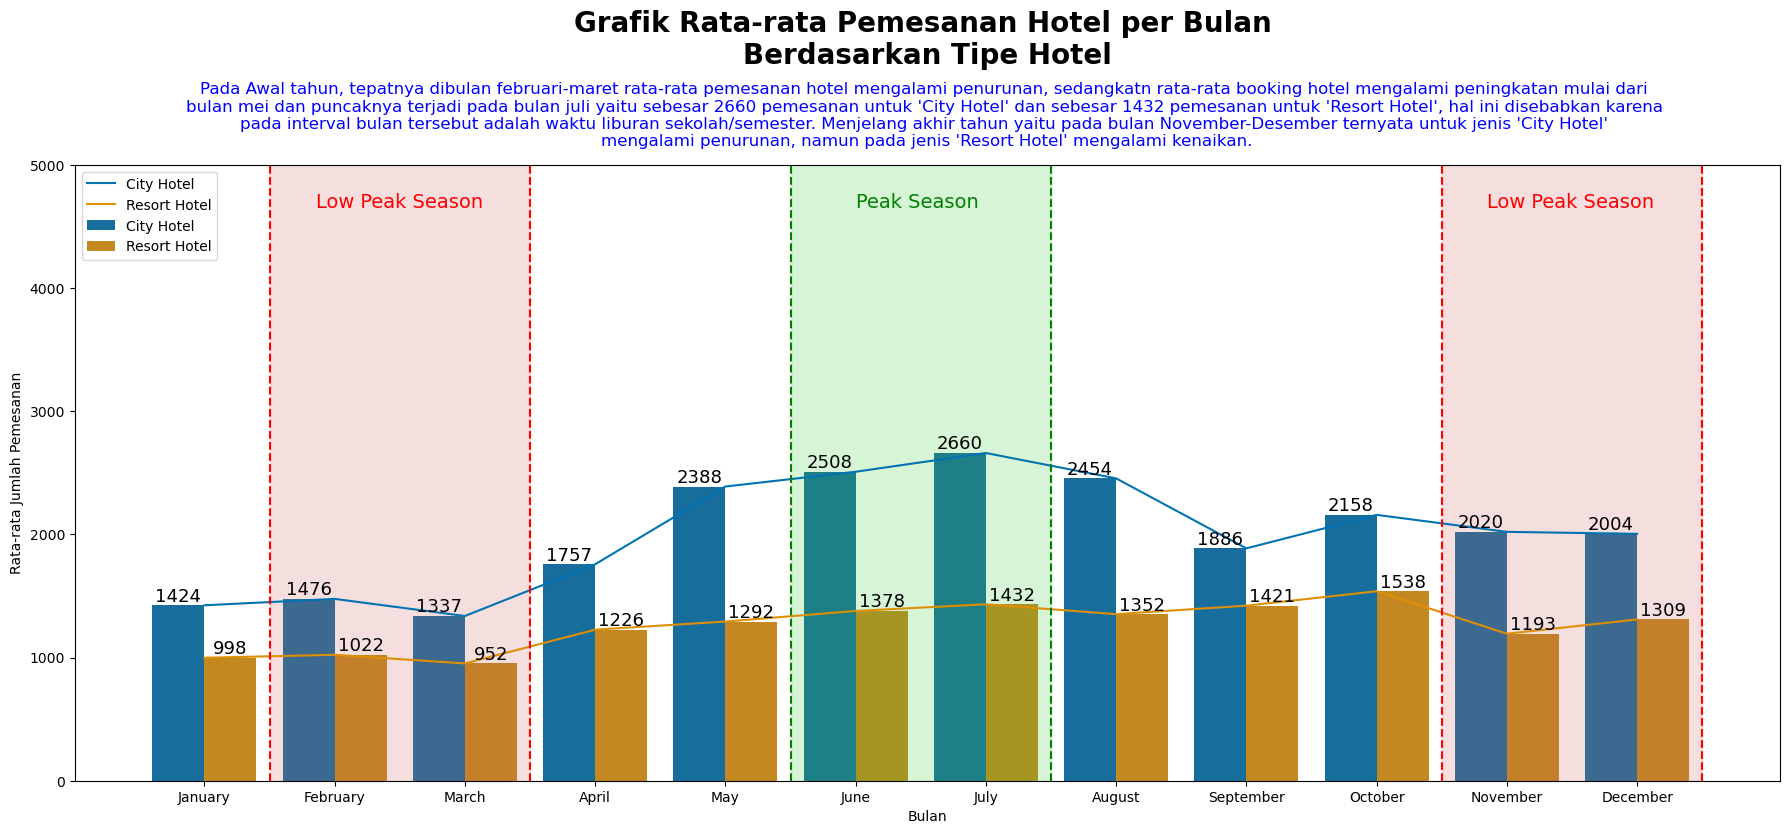

In [34]:
plt.figure(figsize=(22, 8))
ax = sns.barplot(data=data_booking, x='arrival_date_month', y='avg_of_book', hue='hotel', palette='colorblind')
sns.lineplot(data=data_booking, x='arrival_date_month', y='avg_of_book', hue='hotel', palette='colorblind')
plt.legend(loc='best')
plt.ylim(0, 5000)

# Annotate the barplot
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom', fontsize=13, color='black')
    
# awal tahun
plt.axvline(x=0.5, color='r', ls='--', lw=1.5)
plt.axvline(x=2.5, color='r', ls='--', lw=1.5)
plt.text(x=0.86, y=4700, s='Low Peak Season', fontsize=14, color='r', va='center')

# Menambahkan warna area di antara garis putus merah
x_values = [0.5, 2.5]
y_values = [5000, 5000]
plt.fill_between(x_values, 0, y_values, color='indianred', alpha=0.2)

# pertengahan tahun
plt.axvline(x=4.5, color='g', ls='--', lw=1.5)
plt.axvline(x=6.5, color='g', ls='--', lw=1.5)
plt.text(x=5, y=4700, s='Peak Season', fontsize=14, color='g', va='center')

# Menambahkan warna area di antara garis putus hijau
x_values = [4.5, 6.5]
y_values = [5000, 5000]

plt.fill_between(x_values, 0, y_values, color='limegreen', alpha=0.2)

# akhir tahun
plt.axvline(x=9.5, color='r', ls='--', lw=1.5)
plt.axvline(x=11.5, color='r', ls='--', lw=1.5)
plt.text(x=9.85, y=4700, s='Low Peak Season', fontsize=14, color='r', va='center')

# Menambahkan warna area di antara garis putus merah
x_values = [9.5, 11.5]
y_values = [5000, 5000]
plt.fill_between(x_values, 0, y_values, color='indianred', alpha=0.2)

#Labeling dan judul
plt.title("Grafik Rata-rata Pemesanan Hotel per Bulan \nBerdasarkan Tipe Hotel", fontsize=20, weight='bold', y=1.15)
plt.xlabel("Bulan")
plt.ylabel("Rata-rata Jumlah Pemesanan")

# Mengukur lebar grafik saat ini
# Memberikan text deskripsi
width = ax.get_xlim()[1]

text = "Pada Awal tahun, tepatnya dibulan februari-maret rata-rata pemesanan hotel mengalami penurunan, sedangkatn rata-rata booking hotel mengalami peningkatan mulai dari \nbulan mei dan puncaknya terjadi pada bulan juli yaitu sebesar 2660 pemesanan untuk 'City Hotel' dan sebesar 1432 pemesanan untuk 'Resort Hotel', hal ini disebabkan karena \npada interval bulan tersebut adalah waktu liburan sekolah/semester. Menjelang akhir tahun yaitu pada bulan November-Desember ternyata untuk jenis 'City Hotel' \nmengalami penurunan, namun pada jenis 'Resort Hotel' mengalami kenaikan."
plt.text((width / 2)-0.5, 5400, text, fontsize=12, color='blue', ha='center', va='center', wrap=True)

plt.show()


### Interpretasi :
- Pada awala tahun, bisa dilihat bahwa rata-rata pemesanan hotel mengalami penurunan yaitu dari bulan februari ke maret, hal ini berlaku untuk kedua jenis tipe hotel. Penurunan ini bisa disebabkan karena dimulainya kegiatan akademisi di sekolah sekolah/universitas dan perkantoran.
- Puncak kenaikan rata-rata pemesanan terjadi pada bulan Juli, dimana terus mengalami peningkatan dimulai pada bulan Mei hingga Juli. Pada interaval bulan ini merupakan libur tengah tahun atau libur pertengahan semester, sehingga banyak yang memanfaatkan untuk berlibur sehingga menyebabkan peningkatan pemesanan hotel.
- Pada akhir tahun grafik antara tipe hotel city dan resort berbeda. City hotel mengalami penurunan rata-rata book meski tidak signifikan jika dibanding dengan bulan sebelumnya. Sedangkan untuk Resort hotel mengalami kenaikan meskipun tidak terlalu signifikan juga. 


# Task 3

In [35]:
data.sample(3)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,meal,city,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,total_guests,stay_duration,num_of_month
21120,Resort Hotel,0,0,2019,May,13,28,0,1,1,0,0,Breakfast,Kota Denpasar,Corporate,Corporate,1,0,4,0,No Deposit,0,47,0,Personal,35.0,0,0,Check-Out,1,1,5
33259,Resort Hotel,0,3,2019,April,7,18,0,1,2,0,0,Breakfast,Kota Batu,Offline TA/TO,TA/TO,0,0,0,0,No Deposit,436,0,0,Personal,42.0,1,0,Check-Out,2,1,4
95399,City Hotel,0,203,2018,October,34,17,0,2,3,0,0,Breakfast,Kota Denpasar,Online TA,TA/TO,0,0,0,0,No Deposit,9,0,0,Family,133.2,0,1,Check-Out,3,2,10


In [36]:
def duration(x):
    if x['stay_duration'] <= 7:
        return '1st Week'
    elif x['stay_duration'] <= 14:
        return '2nd Week'
    elif x['stay_duration'] <= 21:
        return '3rd Week'
    else:
        return "4th Week"

In [37]:
data['Stay Duration'] = data.apply(lambda x: duration(x), axis=1)
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,meal,city,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,total_guests,stay_duration,num_of_month,Stay Duration
2,Resort Hotel,0,7,2017,September,27,1,0,1,1,0,0,Breakfast,Kabupaten Bangka,Direct,Direct,0,0,0,0,No Deposit,0,0,0,Personal,75.0,0,0,Check-Out,1,1,9,1st Week
3,Resort Hotel,0,13,2017,September,27,1,0,1,1,0,0,Breakfast,Kabupaten Bangka,Corporate,Corporate,0,0,0,0,No Deposit,304,0,0,Personal,75.0,0,0,Check-Out,1,1,9,1st Week
4,Resort Hotel,0,14,2017,September,27,1,0,2,2,0,0,Breakfast,Kabupaten Bangka,Online TA,TA/TO,0,0,0,0,No Deposit,240,0,0,Personal,98.0,0,1,Check-Out,2,2,9,1st Week
6,Resort Hotel,0,0,2017,September,27,1,0,2,2,0,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,0,No Deposit,0,0,0,Personal,107.0,0,0,Check-Out,2,2,9,1st Week
7,Resort Hotel,0,9,2017,September,27,1,0,2,2,0,0,Full Board,Kota Denpasar,Direct,Direct,0,0,0,0,No Deposit,303,0,0,Personal,103.0,0,1,Check-Out,2,2,9,1st Week


In [38]:
df_grup = data.groupby(['hotel','Stay Duration']).size().reset_index(name='tot_week')
df_grup1 = data.groupby(['hotel','Stay Duration','is_canceled']).size().reset_index(name='per_week')
df_gab = df_grup1.merge(df_grup, on=['hotel','Stay Duration'], how='left')
df_gab['Rasio'] = round((df_gab['per_week']/df_gab['tot_week'])*100,2)
df_gab

,hotel,Stay Duration,is_canceled,per_week,tot_week,Rasio
0,City Hotel,1st Week,0,35845,51037,70.23
1,City Hotel,1st Week,1,15192,51037,29.77
2,City Hotel,2nd Week,0,486,1009,48.17
3,City Hotel,2nd Week,1,523,1009,51.83
4,City Hotel,3rd Week,0,27,100,27.00
5,City Hotel,3rd Week,1,73,100,73.00
6,City Hotel,4th Week,0,6,45,13.33
7,City Hotel,4th Week,1,39,45,86.67
8,Resort Hotel,1st Week,0,22665,29523,76.77
9,Resort Hotel,1st Week,1,6858,29523,23.23


In [39]:
#filter is_canceled
df_gab = df_gab[df_gab['is_canceled']==1]
df_gab

,hotel,Stay Duration,is_canceled,per_week,tot_week,Rasio
1,City Hotel,1st Week,1,15192,51037,29.77
3,City Hotel,2nd Week,1,523,1009,51.83
5,City Hotel,3rd Week,1,73,100,73.00
7,City Hotel,4th Week,1,39,45,86.67
9,Resort Hotel,1st Week,1,6858,29523,23.23
11,Resort Hotel,2nd Week,1,939,3450,27.22
13,Resort Hotel,3rd Week,1,47,134,35.07
15,Resort Hotel,4th Week,1,26,80,32.50


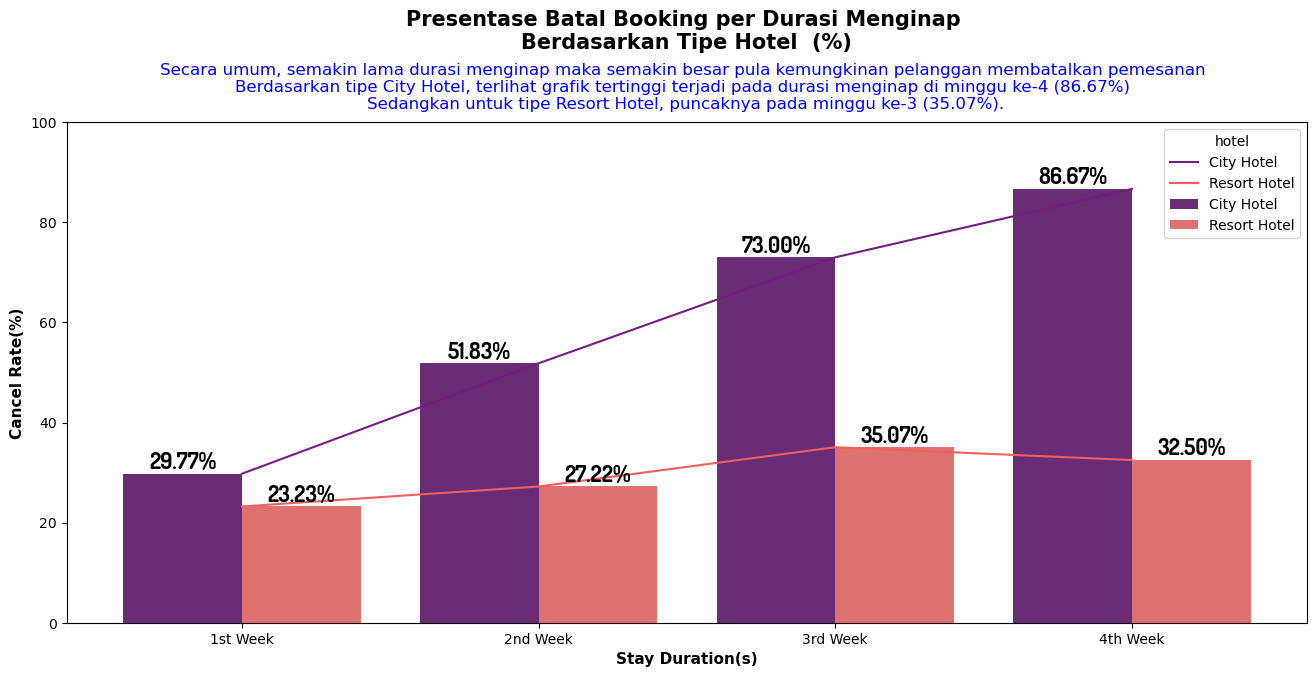

In [40]:
plt.figure(figsize=(16, 6.5))
ax = sns.barplot(data=df_gab, x='Stay Duration', y='Rasio', hue='hotel', palette='magma')
sns.lineplot(data=df_gab, x='Stay Duration', y='Rasio', hue='hotel', palette='magma')
plt.title('Presentase Batal Booking per Durasi Menginap \nBerdasarkan Tipe Hotel  (%)', fontsize=15, weight='bold', y=1.13)
plt.xlabel('Stay Duration(s)', fontsize=11, weight='bold')
plt.ylabel('Cancel Rate(%)', fontsize=11,weight='bold')
plt.ylim(0,100)

'''sns.regplot(x=np.arange(0, len(df_gab[df_gab['hotel'] == 'City Hotel'])), y='Rasio', 
            data=df_gab[df_gab['hotel'] == 'City Hotel'], scatter=False, label = 'Trend City Hotel', truncate=False)
sns.regplot(x=np.arange(0, len(df_gab[df_gab['hotel'] == 'City Hotel'])), y='Rasio', 
            data=df_gab[df_gab['hotel'] == 'Resort Hotel'], scatter=False, label='Trend Resort Hotel', truncate=False)'''

#memberikan label value otomatis
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.2f}%', (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom', fontsize=16, color='black', fontname='dosis', weight='bold')
       
# Mengukur lebar grafik saat ini
# Memberikan text deskripsi
width = ax.get_xlim()[1]

text = "Secara umum, semakin lama durasi menginap maka semakin besar pula kemungkinan pelanggan membatalkan pemesanan \nBerdasarkan tipe City Hotel, terlihat grafik tertinggi terjadi pada durasi menginap di minggu ke-4 (86.67%) \nSedangkan untuk tipe Resort Hotel, puncaknya pada minggu ke-3 (35.07%)."
plt.text((width / 2)-0.3, 107, text, fontsize=12, color='blue', ha='center', va='center', wrap=True)

plt.show()


### Interpretasi :

- Tingkat pembatalan pada tipe City Hotel sangat signifikan jika dilihat berdasarkan durasi menginap, tidak jauh berbeda pada tipe Resort Hotel dimana terjadi peningkatan namun tidak signifikan.<br>

- Tingkat pembatalan tertinggi di City Hotel terjadi pada durasi menginap di atas 4 minggu, sedangkan untuk Resort Hotel, tingkat pembatalan tertinggi terjadi pada durasu menginap 3 minggu.

- Kedua tipe hotel baik City maupun Resort Hotel sama-sama menunjukkan korelasi positif antara Durasi Menginap dengan Presentase Pembatalan dimana semakin lama pelanggan menginap, maka tingkat pembatalan akan semakin tinggi.


# Task 4

In [41]:
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,meal,city,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,total_guests,stay_duration,num_of_month,Stay Duration
2,Resort Hotel,0,7,2017,September,27,1,0,1,1,0,0,Breakfast,Kabupaten Bangka,Direct,Direct,0,0,0,0,No Deposit,0,0,0,Personal,75.0,0,0,Check-Out,1,1,9,1st Week
3,Resort Hotel,0,13,2017,September,27,1,0,1,1,0,0,Breakfast,Kabupaten Bangka,Corporate,Corporate,0,0,0,0,No Deposit,304,0,0,Personal,75.0,0,0,Check-Out,1,1,9,1st Week
4,Resort Hotel,0,14,2017,September,27,1,0,2,2,0,0,Breakfast,Kabupaten Bangka,Online TA,TA/TO,0,0,0,0,No Deposit,240,0,0,Personal,98.0,0,1,Check-Out,2,2,9,1st Week
6,Resort Hotel,0,0,2017,September,27,1,0,2,2,0,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,0,No Deposit,0,0,0,Personal,107.0,0,0,Check-Out,2,2,9,1st Week
7,Resort Hotel,0,9,2017,September,27,1,0,2,2,0,0,Full Board,Kota Denpasar,Direct,Direct,0,0,0,0,No Deposit,303,0,0,Personal,103.0,0,1,Check-Out,2,2,9,1st Week


In [42]:
data.lead_time.unique()

array([  7,  13,  14,   0,   9,  85,  75,  23,  35,  68,  18,  37,  12,
        72, 127,  78,  48,  60,  77,  99, 118,  95,  96,  69,  45,  40,
        15,  36,  43,  70,  16, 107,  47, 113,  90,  50,  93,  76,   3,
         1,  10,   5,  17,  51,  71,  63,  62, 101,   2,  81, 368, 364,
       324,  79,  21, 109, 102,   4,  98,  92,  26,  73, 115,  86,  52,
        29,  30,  33,  32,   8, 100,  44,  80,  97,  64,  39,  34,  27,
        82,  94, 110, 111,  84,  66, 104,  28, 258, 112,  65,  67,  55,
        88,  54, 292,  83, 105, 280, 394,  24, 103, 366, 249,  22,  91,
        11, 108, 106,  31,  87,  41, 304, 117,  59,  53,  58, 116,  42,
       321,  38,  56,  49, 317,   6,  57,  19,  25, 315, 123,  46,  89,
        61, 312, 299, 130,  74, 298, 119,  20, 286, 136, 129, 124, 327,
       131, 460, 140, 114, 139, 122, 137, 126, 120, 128, 135, 150, 143,
       151, 132, 125, 157, 147, 138, 156, 164, 346, 159, 160, 161, 333,
       381, 149, 154, 297, 163, 314, 155, 323, 340, 356, 142, 32

In [43]:
print(data.lead_time.min())
print(data.lead_time.max())


0
709


### Observasi :
- Berdasarkan nilai yang ada pada kolom lead_time, interval datanya mulai dari 0 hingga 709, maka pengelompokkan akan dibagi menjadi data bulanan.

In [44]:
def duration(x):
    if x['lead_time'] <= 30:
        return '<=1 Month'
    elif x['lead_time'] <=60:
        return '2 Month'
    elif x['lead_time'] <=90:
        return '3 Month'
    elif x['lead_time'] <=120:
        return '4 Month'
    elif x['lead_time'] <=150:
        return '5 Month'
    elif x['lead_time'] <=180:
        return '6 Month'
    elif x['lead_time'] <=210:
        return '7 Month'
    elif x['lead_time'] <=240:
        return '8 Month'
    elif x['lead_time'] <=270:
        return '9 Month'
    elif x['lead_time'] <=300:
        return '10 Month'
    elif x['lead_time'] <=330:
        return '11 Month'
    elif x['lead_time'] <=360:
        return '12 Month'
    else :
        return '=>12 Month'
    
data['leadtime_group'] = data.apply(lambda x: duration(x), axis=1)

In [45]:
data.sample(3)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,meal,city,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,total_guests,stay_duration,num_of_month,Stay Duration,leadtime_group
110680,City Hotel,0,161,2019,June,17,28,1,2,3,0,0,Breakfast,Kota Malang,Online TA,TA/TO,0,0,0,0,No Deposit,9,0,0,Personal,166.5,0,0,Check-Out,3,3,6,1st Week,6 Month
23821,Resort Hotel,0,15,2018,July,19,2,1,2,1,0,0,Breakfast,Kabupaten Kepulauan Seribu,Online TA,TA/TO,0,0,0,0,No Deposit,240,0,0,Personal,90.0,0,1,Check-Out,1,3,7,1st Week,<=1 Month
18246,Resort Hotel,0,37,2017,January,46,8,2,5,1,0,0,Breakfast,Kabupaten Bangka,Corporate,Corporate,0,0,0,1,No Deposit,185,281,0,Family,58.2,1,0,Check-Out,1,7,1,1st Week,2 Month


In [46]:
data['leadtime_group'] = data['leadtime_group'].astype('object')

In [47]:
dataku = data.copy()
df_grup2 = dataku.groupby(['hotel','leadtime_group']).size().reset_index(name='tot_group_leadtime')
df_grup3 = dataku.groupby(['hotel','leadtime_group','is_canceled']).size().reset_index(name='per_grup_leadtime')
df_gab1 = df_grup3.merge(df_grup2, on=['hotel','leadtime_group'], how='left')
df_gab1['rasio_lead'] = round((df_gab1['per_grup_leadtime']/df_gab1['tot_group_leadtime'])*100,2)
df_gab1

,hotel,leadtime_group,is_canceled,per_grup_leadtime,tot_group_leadtime,rasio_lead
0,City Hotel,10 Month,0,307,634,48.42
1,City Hotel,10 Month,1,327,634,51.58
2,City Hotel,11 Month,0,200,460,43.48
3,City Hotel,11 Month,1,260,460,56.52
4,City Hotel,12 Month,0,87,244,35.66
5,City Hotel,12 Month,1,157,244,64.34
6,City Hotel,2 Month,0,5818,8702,66.86
7,City Hotel,2 Month,1,2884,8702,33.14
8,City Hotel,3 Month,0,4069,6157,66.09
9,City Hotel,3 Month,1,2088,6157,33.91


In [48]:
#filter is_canceled
df_gab1 = df_gab1[df_gab1['is_canceled']==1]
df_gab1

,hotel,leadtime_group,is_canceled,per_grup_leadtime,tot_group_leadtime,rasio_lead
1,City Hotel,10 Month,1,327,634,51.58
3,City Hotel,11 Month,1,260,460,56.52
5,City Hotel,12 Month,1,157,244,64.34
7,City Hotel,2 Month,1,2884,8702,33.14
9,City Hotel,3 Month,1,2088,6157,33.91
11,City Hotel,4 Month,1,1684,4715,35.72
13,City Hotel,5 Month,1,1312,3600,36.44
15,City Hotel,6 Month,1,1170,3021,38.73
17,City Hotel,7 Month,1,837,2100,39.86
19,City Hotel,8 Month,1,568,1383,41.07


In [49]:
df_lead = df_gab1[df_gab1['is_canceled']==1].sort_values('leadtime_group', ascending=True)
df_lead

,hotel,leadtime_group,is_canceled,per_grup_leadtime,tot_group_leadtime,rasio_lead
1,City Hotel,10 Month,1,327,634,51.58
27,Resort Hotel,10 Month,1,183,584,31.34
3,City Hotel,11 Month,1,260,460,56.52
29,Resort Hotel,11 Month,1,222,496,44.76
5,City Hotel,12 Month,1,157,244,64.34
31,Resort Hotel,12 Month,1,148,358,41.34
7,City Hotel,2 Month,1,2884,8702,33.14
33,Resort Hotel,2 Month,1,1292,4389,29.44
9,City Hotel,3 Month,1,2088,6157,33.91
35,Resort Hotel,3 Month,1,928,3037,30.56


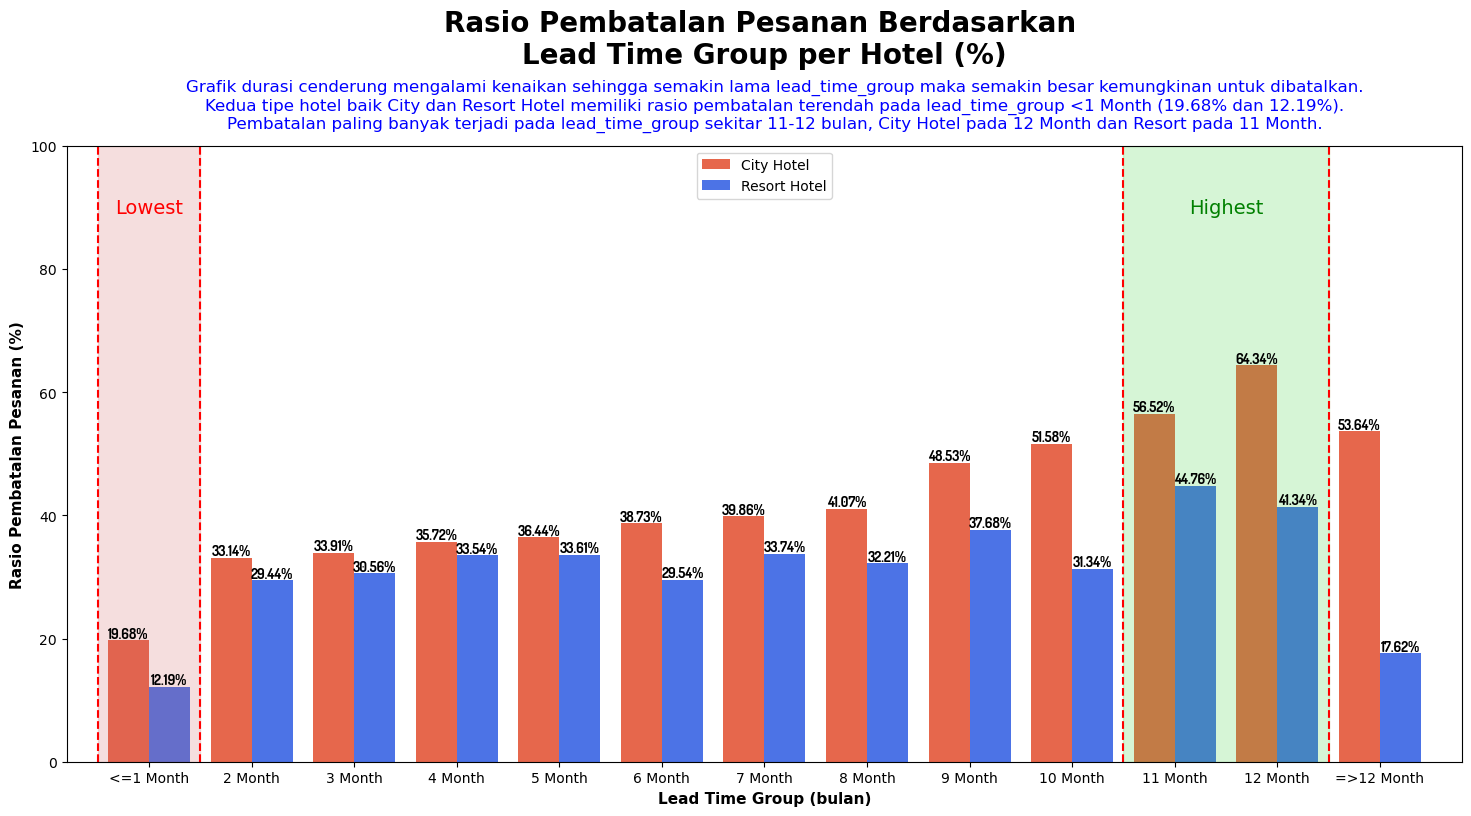

In [61]:
plt.figure(figsize=(18, 8))
sorter =['<=1 Month', '2 Month', '3 Month', '4 Month', '5 Month', '6 Month', '7 Month', '8 Month', '9 Month', '10 Month', '11 Month', '12 Month', '=>12 Month']
custom_palette = ["#FF5733", "#3366FF"]
ax = sns.barplot(data=df_lead, x='leadtime_group', y='rasio_lead', hue='hotel', palette=custom_palette, order = sorter)
#sns.lineplot(data=df_gab1, x='leadtime_group', y='Rasio', hue='hotel', palette='magma')
plt.xlim(-0.8,12.8)
plt.ylim(0,100)
plt.title('Rasio Pembatalan Pesanan Berdasarkan \nLead Time Group per Hotel (%)', fontsize=20, weight='bold', y=1.12)
plt.xlabel('Lead Time Group (bulan)', fontsize=11, weight='bold')
plt.ylabel('Rasio Pembatalan Pesanan (%)', fontsize=11,weight='bold')

# bulan awal
plt.axvline(x=-0.5, color='r', ls='--', lw=1.5)
plt.axvline(x=0.5, color='r', ls='--', lw=1.5)
plt.text(x=0, y=90, s='Lowest', fontsize=14, color='r', va='center', ha='center')

# Menambahkan warna area di antara garis putus merah
x_values = [-0.5, 0.5]
y_values = [100, 100]
plt.fill_between(x_values, 0, y_values, color='indianred', alpha=0.2)

# berbulan-bulan
plt.axvline(x=9.5, color='r', ls='--', lw=1.5)
plt.axvline(x=11.5, color='r', ls='--', lw=1.5)
plt.text(x=10.5, y=90, s='Highest', fontsize=14, color='g', va='center', ha='center')

# Menambahkan warna area di antara garis putus hijau
x_values = [9.5, 11.5]
y_values = [100, 100]
plt.fill_between(x_values, 0, y_values, color='limegreen', alpha=0.2)

plt.legend(loc='upper center')

#memberikan label value otomatis
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.2f}%', (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom', fontsize=10, color='black', fontname='dosis', weight='bold')
       
# Mengukur lebar grafik saat ini
# Memberikan text deskripsi
width = ax.get_xlim()[1]

text = "Grafik durasi cenderung mengalami kenaikan sehingga semakin lama lead_time_group maka semakin besar kemungkinan untuk dibatalkan.\nKedua tipe hotel baik City dan Resort Hotel memiliki rasio pembatalan terendah pada lead_time_group <1 Month (19.68% dan 12.19%).\nPembatalan paling banyak terjadi pada lead_time_group sekitar 11-12 bulan, City Hotel pada 12 Month dan Resort pada 11 Month."
plt.text((width / 2)-0.3, 106.5, text, fontsize=12, color='blue', ha='center', va='center', wrap=True)

plt.show()


### Observasi :

- Grafik cenderung menunjukkan data yang selalu naik, dan sempat menurun pada waktu pemesanan yang lebih dari 12 bulan

- Semakin lama waktu pemesanan maka semakin besar kemungkinan untuk dibatalkan.

- Kedua tipe hotel baik City dan Resort Hotel memiliki rasio pembatalan terendah pada lead_time_group <1 Month (19.68% dan 12.19%).

- Pembatalan paling banyak terjadi pada lead_time_group sekitar 11-12 bulan, City Hotel pada 12 bulan (64.34%) dan Resort pada 11 bulan (44.76%).


